<a href="https://colab.research.google.com/github/fianadew/tensorflow/blob/main/sentiemen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SUBMISSION 1 PENGEMBANGAN MACHINE LEARNING


Nama : Fiana Dewi

In [ ]:
import os
import re
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Didalam zip terdapat 2 jenis file yaitu train dan test. File train untuk melatih model, sementara file test untuk membuat prediksi dari model yang sudah dilatih
#local_zip = '/tmp/sentimen.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

In [ ]:
#Membaca file csv train
train_df = pd.read_csv("/content/drive/My Drive/sentimen/train.csv")
test_df = pd.read_csv("/content/drive/My Drive/sentimen/test.csv")
#Menghapus karakter selain kalimat
train_df['tweet'] = train_df['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
#Membaca data train
train_df

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...


Grafik missing value


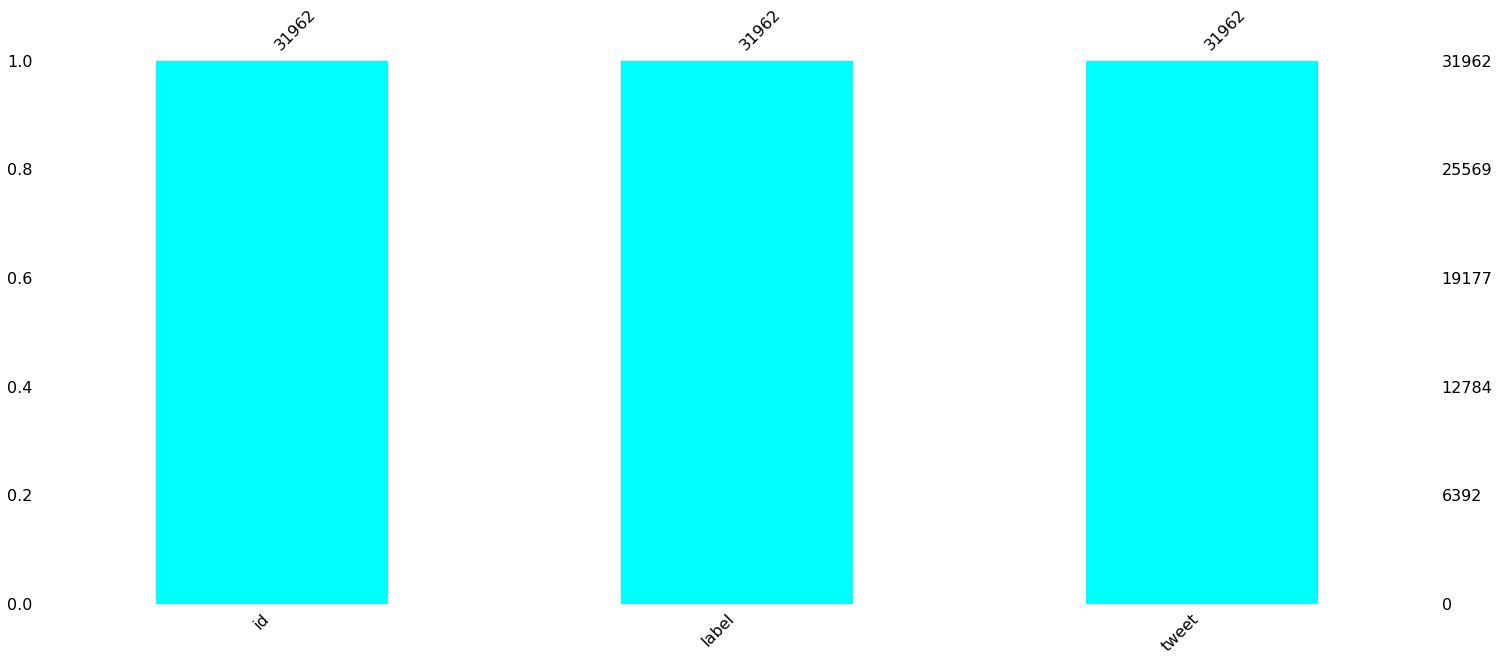

In [ ]:
print('Grafik missing value')
msno.bar(train_df, color='aqua')

In [ ]:
#Mengubah ke bentuk list
sentence = train_df['tweet'].values
label = train_df['label'].values
#Splitting data 
x_train, x_test, y_train, y_test = train_test_split(sentence, label, test_size=0.2)

In [ ]:
#Membuat objek tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>', filters='!@#$%^&*()_+}{":\><.,?][-=', lower=True)
#Mengubah kata menjadi number
tokenizer.fit_on_texts(x_train)
#Melihat kata yang telah diubah mejadi number
print(len(tokenizer.word_index))

36029


In [ ]:
#Mengubah nilai kedalam bentuk vektor
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)
#Menyesuaikan panjang vektor dengan menggunakan padding
padding_train = pad_sequences(sequence_train)
padding_test = pad_sequences(sequence_test)
print('shape of padding_train', padding_train.shape)
print('shape of padding_test', padding_test.shape)

shape of padding_train (25569, 34)
shape of padding_test (6393, 30)


In [ ]:
#membuat arsitektur model Sequential dengan parameter embedding dan LSTM
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(20000, 50),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#membuat callback dan memberhentikan epochs apabila akurasi telah mencapai >90%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print('\nAkurasi telah mencapai >95%')
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#melatih model dan menyimpannya dalam variabel history
history = model.fit(padding_train, y_train, epochs=20, batch_size=258, validation_data=(padding_test, y_test), verbose=1, callbacks=[callbacks])

Epoch 1/20
100/100 [==============================] - 8s 62ms/step - loss: 0.3430 - accuracy: 0.9208 - val_loss: 0.2101 - val_accuracy: 0.9349
Epoch 2/20
100/100 [==============================] - 6s 56ms/step - loss: 0.1610 - accuracy: 0.9442 - val_loss: 0.1163 - val_accuracy: 0.9575
Epoch 3/20
100/100 [==============================] - 6s 56ms/step - loss: 0.0851 - accuracy: 0.9707 - val_loss: 0.1165 - val_accuracy: 0.9593

Akurasi telah mencapai >95%


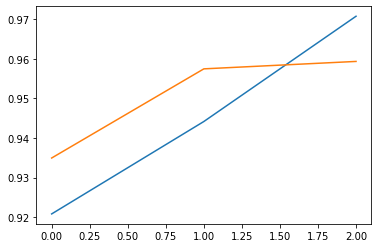

In [ ]:
#membuat plotting grafik akurasi
akurasi = history.history['accuracy']
val_akurasi = history.history['val_accuracy']
plt.plot(akurasi)
plt.plot(val_akurasi)
plt.show()


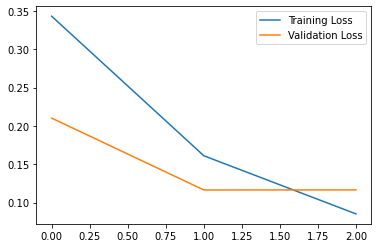

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()
